In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [139]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
test_id = test['PassengerId']

In [141]:
train.drop(['PassengerId','Ticket'],axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [143]:
train['Name'] = train['Name'].apply(lambda name: name.split(".")[0].split(",")[1].replace(" ",""))
test['Name'] = test['Name'].apply(lambda name: name.split(".")[0].split(",")[1].replace(" ",""))

In [144]:
dic = {
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Dr":"Officer",
    "Rev":"Officer",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs" :"Mrs",
    "Miss" :"Miss",
    "Master" :"Master",
    "Lady" :"Royalty" }

test['Name'] = test['Name'].apply(lambda name: dic.get(name))
train['Name'] = train['Name'].apply(lambda name: dic.get(name))

In [145]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [148]:
train['Cabin'].fillna("T", inplace=True)
test['Cabin'].fillna("T", inplace=True)

In [149]:
train['Cabin'] = train['Cabin'].apply(lambda cabin: cabin[0])
test['Cabin'] = test['Cabin'].apply(lambda cabin: cabin[0])
train['Cabin'].unique()

array(['T', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [150]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [151]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [152]:
print("Quantidade de NA em TRAIN: {}, TEST {}".format(train.isna().sum().sum(),test.isna().sum().sum()))

Quantidade de NA em TRAIN: 1, TEST 1


In [153]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

Fare mediana: 14.4542, média: 35.6271884892086


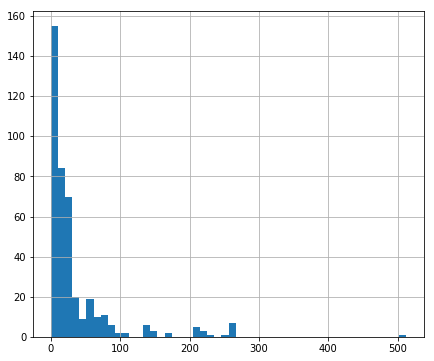

In [154]:
test["Fare"].hist(bins=50, figsize=(7,6))
print("Fare mediana: {}, média: {}".format(test["Fare"].median(), test["Fare"].mean()))

In [155]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [156]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,T,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C
2,1,3,Miss,female,26.0,0,0,7.9250,T,S
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S
4,0,3,Mr,male,35.0,0,0,8.0500,T,S


In [157]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [158]:
test.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Name_Master     0
Name_Miss       0
Name_Mr         0
Name_Mrs        0
Name_Officer    0
Name_Royalty    0
Sex_female      0
Sex_male        0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [159]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.044893,0.206510,0.580247,0.142536,...,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.772166,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.207186,0.405028,0.493796,0.349796,...,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.419670,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


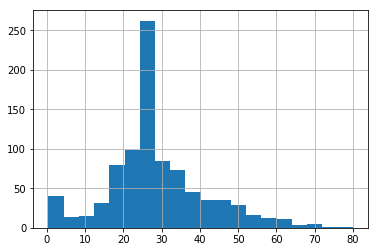

In [160]:
train['Age'].hist(bins=20)

In [161]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
train.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Name_Master     0
Name_Miss       0
Name_Mr         0
Name_Mrs        0
Name_Officer    0
Name_Royalty    0
Sex_female      0
Sex_male        0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [162]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [163]:
x1 = x.iloc[0:791]
x2 = x.iloc[791:]
y1 = y.iloc[0:791]
y2 = y.iloc[791:]

In [164]:
pract = [x for x in range(20) if(x>0)]
result = []
score = []

for i in pract:
        tree = DecisionTreeClassifier(max_depth=i)
        tree.fit(x1,y1)
        score.append(tree.score(x1,y1))
        predict = tree.predict(x2)
        
        result.append(sum((y2==predict)/len(y2)))
#concat = [result,score]
display(pd.DataFrame({"Score":score, "Acurácia":result}, index=pract))

,Score,Acurácia
1,0.785082,0.76
2,0.786346,0.81
3,0.828066,0.84
4,0.844501,0.83
5,0.857143,0.83
6,0.874842,0.83
7,0.888748,0.84
8,0.912769,0.84
9,0.924147,0.84
10,0.940582,0.82


In [168]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
submission = pd.DataFrame()
submission['PassengerId'] = test_id
submission['Survived'] = tree.predict(test)

In [170]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Master', 'Name_Miss',
       'Name_Mr', 'Name_Mrs', 'Name_Officer', 'Name_Royalty', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [171]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Master',
       'Name_Miss', 'Name_Mr', 'Name_Mrs', 'Name_Officer', 'Name_Royalty',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [172]:
submission.to_csv("submission.csv", index=False)